### GRIP - The Spark Foundation
#### Data Science & Business Analytics Intern
#### Author: Shubham Harde
#### Task 1: Prediction using Supervised Machine Learning

* Predict the percentage of an student based on the no. of study hours.
* This is a simple linear regression task as it involves just 2 variables.
* You can use R, Python, SAS Enterprise Miner or any other tool
* Data can be found at http://bit.ly/w-data
* What will be predicted score if a student studies for 9.25 hrs/ day?

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn import metrics

<font color=green> **import** </font> matplotlib.pyplot <font color=green> **as** </font> plt :- 
This line shows how you import the Matplotlib library. Pyplot is just an interface helping us to make easier and better plots. We name it as plt so as not to use matplotlib.pyplot every time we call some methods and hence plt seems faster.

<font color=purple> **%**</font>matplotlib inline :- This line actually is for users doing visualizations in Jupyter Notebooks. 
It is a magic command that tries to show the plots ‘inline’ i.e. to show the plots in the notebook
itself and not displaying the plots in another window.

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df1 = pd.read_csv(url)
print("Data imported successfully")

df1

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# The info() function is used to print a concise summary of a DataFrame.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# The shape attribute of pandas. DataFrame stores the number of rows and columns as a tuple
# (number of rows, number of columns)
df1.shape

(25, 2)

In [9]:
# columns attribute return the column labels of the given Dataframe.
df1.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
# To see statistical details of the dataset, we can use describe()
df1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
# groupby() function is used to split the data into groups based on some criteria
df1.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

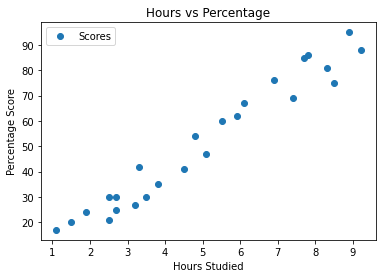

In [12]:
# Plotting the distribution of scores
df1.plot(x='Hours', y='Scores', style='o')#plots one specific column against another specific column
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [13]:
# To find the pairwise correlation of all columns in the dataframe, we can use corr()
df1.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Scatter plot with regression line(by default)')

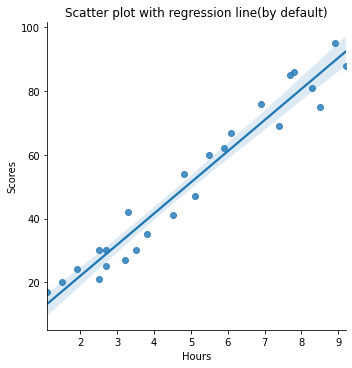

In [14]:
sns.lmplot(x="Hours",y="Scores", data=df1)
plt.title("Scatter plot with regression line(by default)")

Text(0.5, 1.0, 'Scatter plot without regression line')

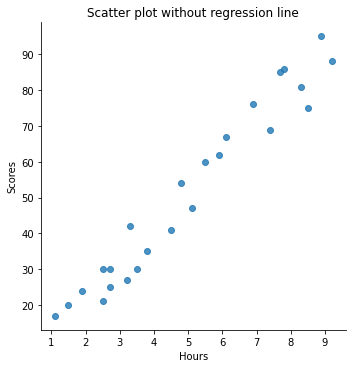

In [15]:
sns.lmplot(x="Hours",y="Scores", fit_reg = False, data=df1)
plt.title("Scatter plot without regression line")

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score with statistical graphics plotting

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [16]:
X = df1.iloc[:, :-1].values # All rows and last column 
y = df1.iloc[:, 1].values  # All rows and 2nd column

In [17]:
print(X)
type(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


numpy.ndarray

In [19]:
print(y)
type(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


numpy.ndarray

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**test_size :-** The size of split can be specified via "test_size" argument that takes a no. of rows(int)or a percentage(float) of the size of the dataset between 0 and 1. test_size=0.2 means 20% of dataset allocated to the test set and 80% of dataset allocated to the training set.

**random_state :-** Random state ensures that splits that you generate are reproducible. If you do not use a random_state in train_test_split, everytime you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue.

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [22]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

print("Training complete.")

Training complete.


To retrieve the intercept:

In [23]:
print(regressor.intercept_)

2.018160041434683


For retrieving the slope (coefficient of x):

In [24]:
print(regressor.coef_)

[9.91065648]


**regressor.coef_ :-** If a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

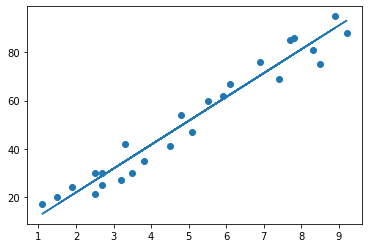

In [26]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_  #y = mx + b 

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

### Visualising the Training set results

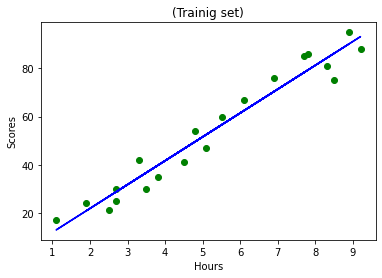

In [27]:
# PLotting the training set
plt.scatter(X_train,y_train, color='green')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Visualising the Test set results

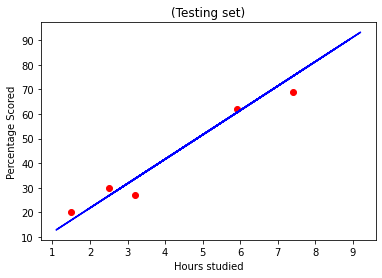

In [29]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Testing set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [30]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [31]:
# Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [32]:
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


#### Checking accuracy of our model

In [33]:
print("Train : ",regressor.score(X_train,y_train)*100)
print("Test : ",regressor.score(X_test,y_test)*100)

Train :  95.15510725211553
Test :  94.54906892105356


In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


##### You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.